# Gestão da Qualidade

## Lista 3 - Exercício 1

por **Cibele Russo** 

**ICMC/USP - São Carlos SP**


(Fonte: Montgomery, Douglas C. Introdução ao controle estatístico da qualidade. Grupo Gen-LTC, Sétima edição. 2016.)

Um processo está sob controle estatístico com $\bar{\bar{x}}=20$ e s=1,2. As especificações são LIE=16 e LSE = 24.


a. Estime a capacidade do processo com uma razão apropriada de capacidade do processo.

b. Itens produzidos abaixo do limite inferior de especificação devem ser sucateados, enquanto itens produzidos acima do limite superior de especificação devem ser retrabalhados. Qual proporção da saída do processo é sucata e qual proporção é retrabalho?

c. Suponha que sucateamento seja quatro vezes mais dispendioso do que retrabalho. Isso sugere que o deslocamento do centro do processo poderia reduzir os custos gerais? Qual valor para o alvo do processo você recomendaria?


In [1]:
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

LSE = 24
LIE = 16
muchapeu = 20
sigmachapeu = 1.2

**a. Estime a capacidade do processo com uma razão apropriada de capacidade do processo.**

In [2]:
Cp = (LSE - LIE)/(6*sigmachapeu)
Cp

1.1111111111111112

Temos 967 perdas por milhão segundo a Cp.

In [3]:
Cpi = (muchapeu - LIE)/(3*sigmachapeu)
Cpi

1.1111111111111112

In [4]:
Cps = (LSE - muchapeu)/(3*sigmachapeu)
Cps

1.1111111111111112

In [5]:
Cpk = min(Cpi,Cps)
Cpk

1.1111111111111112

Conclusão: O processo está centrado no ponto médio das especificações.

**b. Itens produzidos abaixo do limite inferior de especificação devem ser sucateados, enquanto itens produzidos acima do limite superior de especificação devem ser retrabalhados. Qual proporção da saída do processo é sucata e qual proporação é retrabalho?**

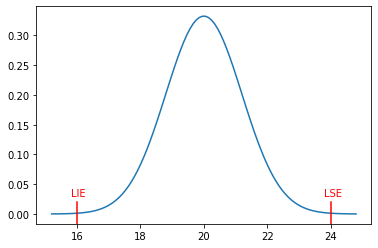

In [11]:
# Ilustração caso a característica da qualidade tenha distribuição normal


import scipy.stats as stats
import math

plt.xlim=(15,25)


mu = 20
sigma=1.2
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma))

plt.axvline(x=16,ymin = 0, ymax = 0.1,color='red')
plt.axvline(x=24,ymin = 0, ymax = 0.1,color='red')
plt.text(15.8, 0.03, 'LIE', fontsize=10, color='red',rotation=0, rotation_mode='anchor')
plt.text(23.8, 0.03, 'LSE', fontsize=10, color='red',rotation=0, rotation_mode='anchor')

plt.show()

**c. Suponha que sucateamento seja quatro vezes mais dispendioso do que retrabalho. Isso sugere que o deslocamento do centro do processo poderia reduzir os custos gerais? Qual valor para o alvo do processo você recomendaria?**

In [20]:
def sucateamento(alvo):
    return(stats.norm.cdf(LIE, alvo, 1.2))

def retrabalho(alvo):
    return(1-stats.norm.cdf(LSE, alvo, 1.2))

def custo(sucat, retrab, C):
    return 4*C*sucat+C*retrab  

In [21]:
sucateamento(20)

0.0004290603331968372

In [22]:
retrabalho(20)

0.0004290603331967846

A proporção de sucateamento é 0.043% e a proporção de retrabalho é 0.043%

In [45]:
x = np.arange(19,21, 0.001)
s = np.zeros(len(x))
r = np.zeros(len(x))
c = np.zeros(len(x))


In [46]:
for i in range(len(x)):
    s[i] = sucateamento(x[i])
    r[i] = retrabalho(x[i])
    c[i] = custo(sucateamento(x[i]),retrabalho(x[i]),1)



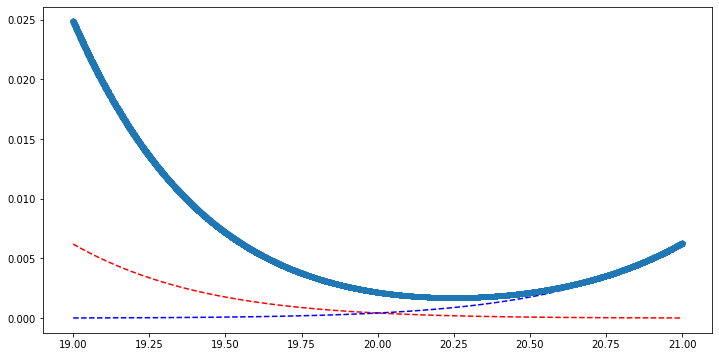

In [47]:
plt.rcParams["figure.figsize"]  = (12,6)

plt.plot(x,s,'r--')
plt.plot(x,r,'b--')
plt.plot(x,c,'p-')


In [48]:
min(c)

0.0016842404635685209

In [49]:
np.argmin(c)

1250

In [50]:
x[np.argmin(c)]

20.250000000001528

In [51]:
s[np.argmin(c)]

0.00019880379111406063

In [52]:
r[np.argmin(c)]

0.0008890252991122782

Resposta c: Recomendaria o valor alvo 20.25 para minimizar o custo.